# Linear Regression with SciKit-Learn
---
----

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

In [4]:
df = pd.read_csv(r'C:\Users\Data\Advertising.csv\Advertising.csv', index_col = 0)

In [5]:
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
plt.style.use(['science','notebook','grid'])

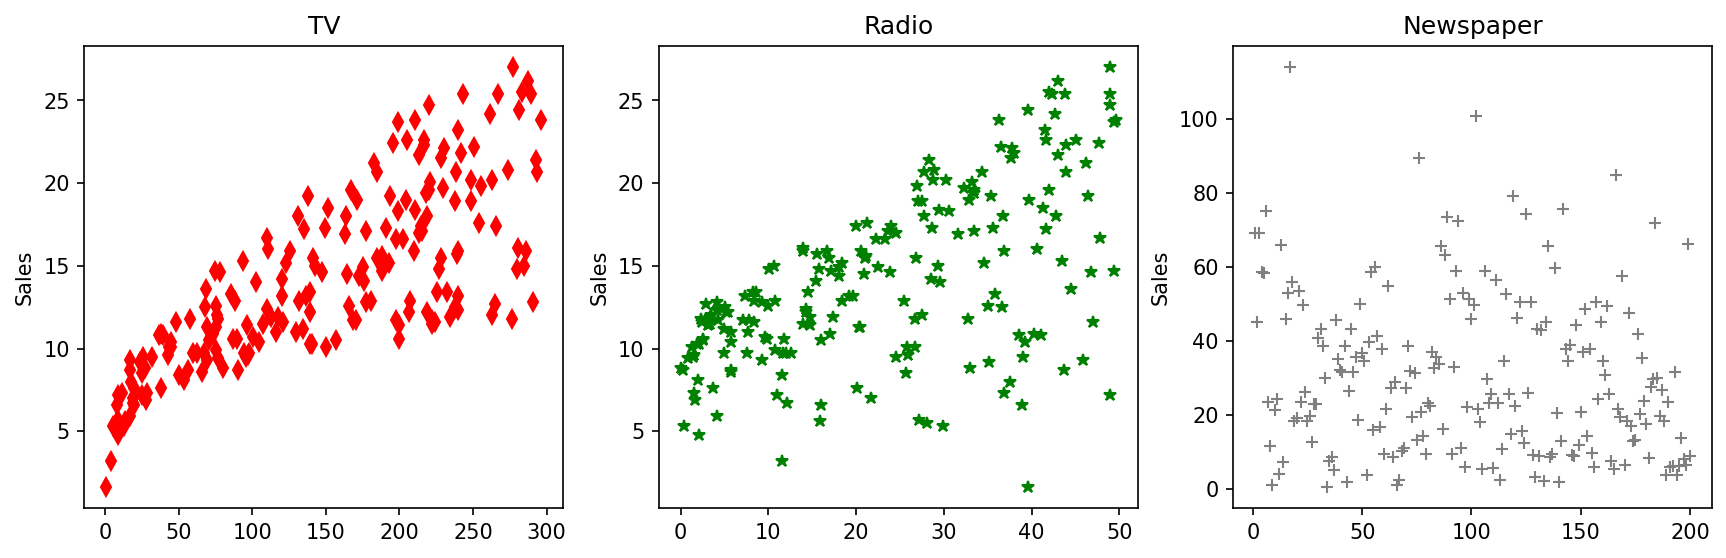

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 4), dpi=150)

axes[0].plot(df['TV'], df['Sales'],'d', c='red')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV')

axes[1].plot(df['Radio'], df['Sales'], '*', c='green')
axes[1].set_ylabel('Sales')
axes[1].set_title('Radio')

axes[2].plot(df['Newspaper'], '+', c='grey')
axes[2].set_ylabel('Sales')
axes[2].set_title('Newspaper');

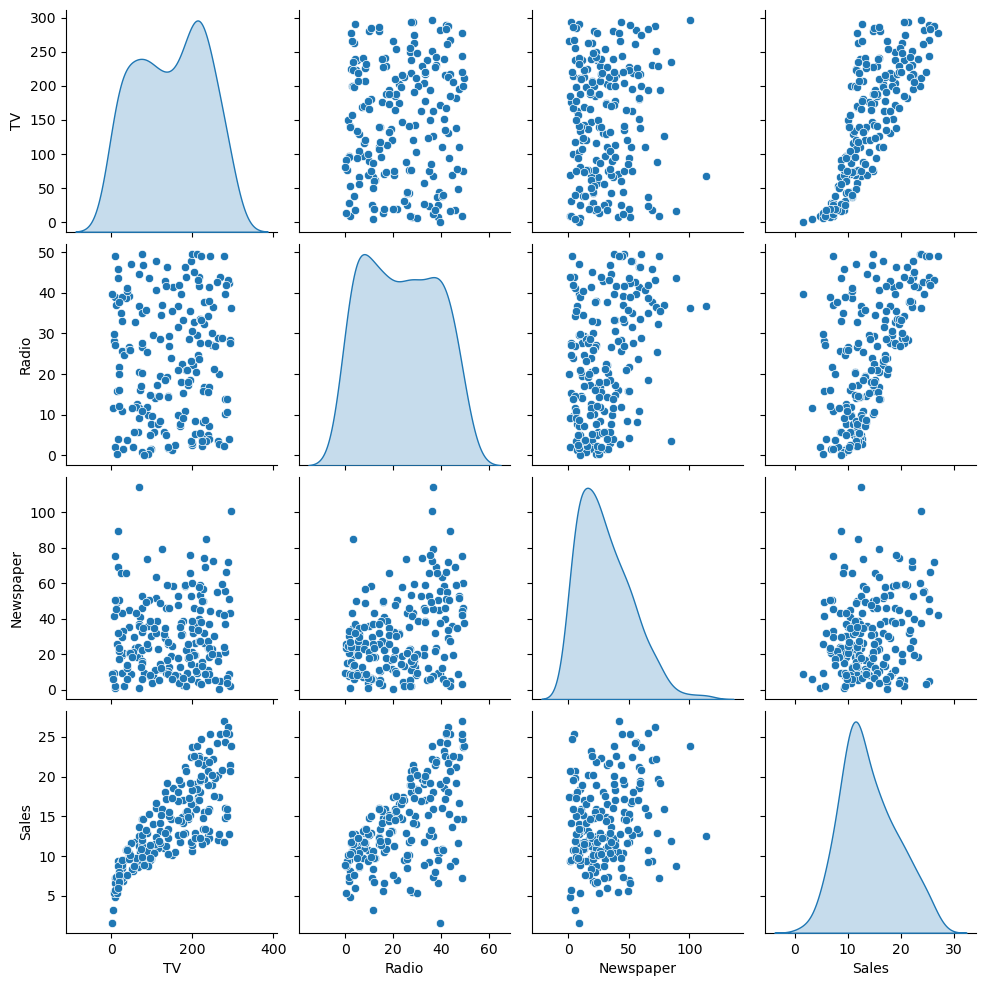

In [7]:
sns.pairplot(df, diag_kind='kde');

In [8]:
# Split data 
X= df.drop('Sales', axis=1)
y = df['Sales']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 101)

In [11]:
X_train

,TV,Radio,Newspaper
86,193.2,18.4,65.7
184,287.6,43.0,71.8
128,80.2,0.0,9.2
54,182.6,46.2,58.7
101,222.4,4.3,49.8
...,...,...,...
64,102.7,29.6,8.4
71,199.1,30.6,38.7
82,239.8,4.1,36.9
12,214.7,24.0,4.0


In [12]:
y_train

86     15.2
184    26.2
128     8.8
54     21.2
101    11.7
       ... 
64     14.0
71     18.3
82     12.3
12     17.4
96     16.9
Name: Sales, Length: 140, dtype: float64

## Create Model Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression()

In [15]:
model.fit(X_train , y_train)

LinearRegression()

## Prediction

In [16]:
test_prediction = model.predict(X_test)

In [17]:
test_prediction

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

## Evaluation Metrics

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
MAE = mean_absolute_error(y_test, test_prediction)
MSE = mean_squared_error(y_test, test_prediction)
RMSE = np.sqrt(MSE)

In [20]:
MAE

1.2137457736144808

In [21]:
MSE

2.298716697886379

In [22]:
RMSE

1.5161519375993882

In [34]:
df['Sales'].mean()

14.022500000000003

-----
------
## Ploting Residuals

<b> It's also important to plot out residuals and check for normal distribution, this helps us understand if Linear Regression was a valid model choice.

In [36]:
test_predictions = model.predict(X_test)

In [37]:
test_predictions

array([15.62347779, 19.69293106, 11.3460929 , 16.92225511,  9.01603163,
        6.82006767, 20.37443008, 17.32931197,  9.70853872, 19.24986927,
       12.26335941, 13.88060985, 13.74435742, 21.2926106 , 18.39902932,
        9.8272711 , 15.6100386 ,  7.57483051,  7.39497997, 20.44761039,
        7.60769238, 18.22390132, 24.78687031, 22.89067208,  7.84904532,
       12.63121132, 21.59580326,  7.88410649, 12.38455495, 12.30767078,
       10.57712073, 19.26692307,  9.99922965,  6.4891503 , 17.2959832 ,
        7.63888314,  9.12734958,  8.16531236, 10.38419866, 10.5871997 ,
       12.82365674,  9.69137313, 10.09133403,  7.83807642, 11.44592364,
        9.95168206,  8.81331353, 16.26362018, 13.18867186, 20.81929952,
       12.33785482, 13.96385684, 17.64409385, 11.0682946 , 12.55084872,
        5.3075589 , 23.40590052, 12.4891591 , 18.86426829, 15.16152314])

In [38]:
test_residual = y_test - test_predictions

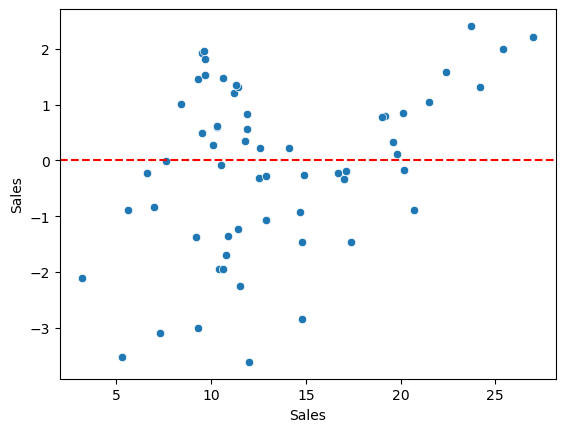

In [39]:
sns.scatterplot(x=y_test, y=test_residual)
plt.axhline(y=0, color='red', ls='--');

In [40]:
len(test_residual)

60

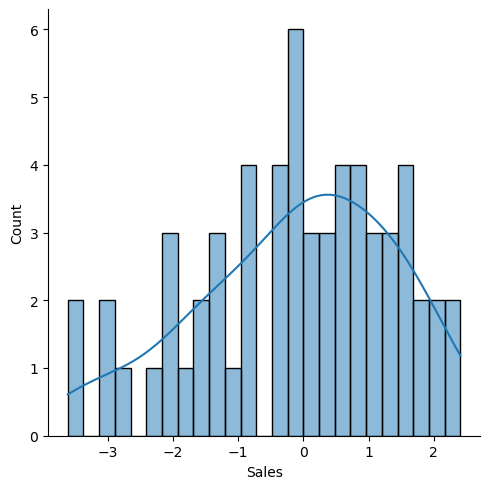

In [41]:
sns.displot(test_residual, bins=25, kde=True);

In [42]:
import scipy as sp

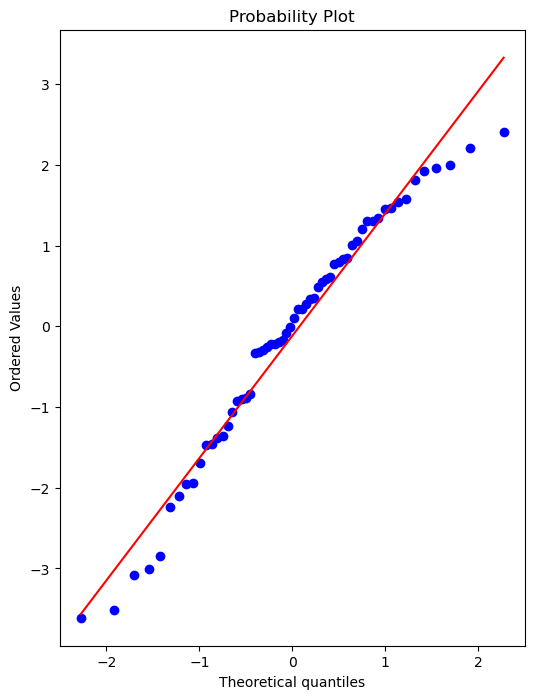

In [43]:
fig,ax = plt.subplots(figsize=(6, 8), dpi=100)

_ = sp.stats.probplot(test_residual, plot=ax);

---
## Retraining Model on Full Data

In [44]:
final_model = model.fit(X, y)

In [45]:
final_model

LinearRegression()

## Prediction

In [46]:
y_hat = final_model.predict(X)

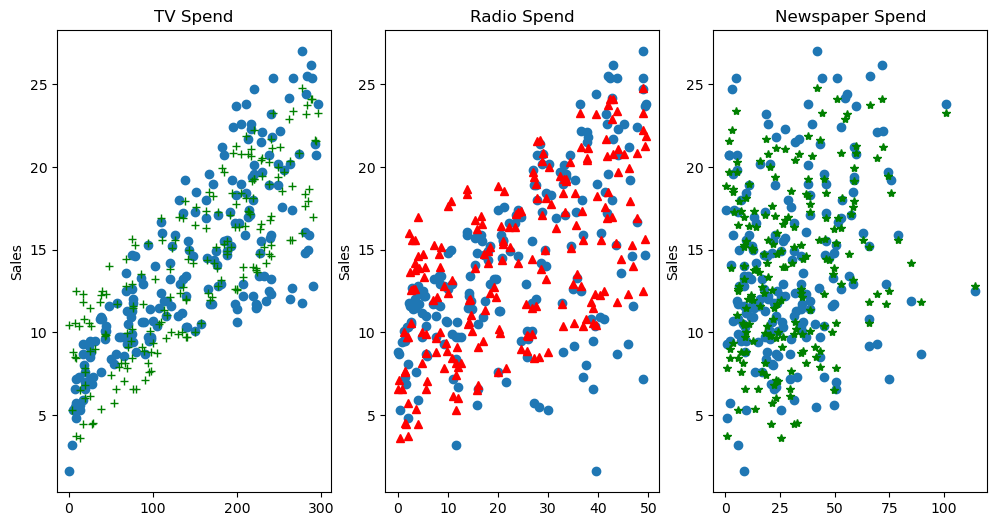

In [50]:
fig,axes = plt.subplots(ncols=3, nrows=1, figsize=(12, 6), dpi=100)

axes[0].plot(df['TV'], df['Sales'], 'o')
axes[0].plot(df['TV'], y_hat, '+', color='green')
axes[0].set_title('TV Spend')
axes[0].set_ylabel('Sales');


axes[1].plot(df['Radio'], df['Sales'], 'o')
axes[1].plot(df['Radio'], y_hat, '^', color='red')
axes[1].set_title('Radio Spend')
axes[1].set_ylabel('Sales');

axes[2].plot(df['Newspaper'], df['Sales'], 'o')
axes[2].plot(df['Newspaper'], y_hat, '*', color='green')
axes[2].set_title('Newspaper Spend')
axes[2].set_ylabel('Sales');




---
## Residuals

In [51]:
residuals = y_hat - y

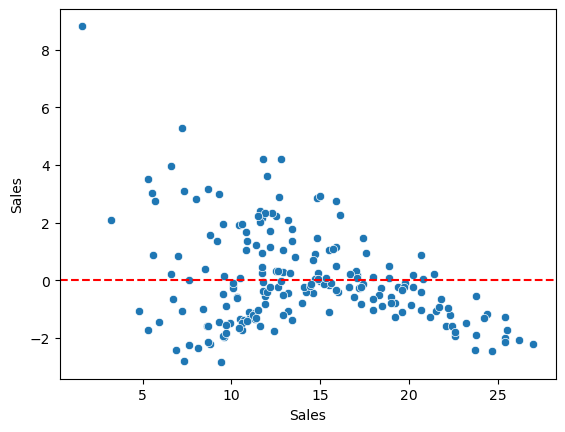

In [52]:
sns.scatterplot(x=y, y=residuals)
plt.axhline(y=0, color='red', ls='--');

----
## Coefficeints

In [53]:
slope = final_model.coef_
slope

array([ 0.04576465,  0.18853002, -0.00103749])

In [54]:
coeff_df = pd.DataFrame(slope, X.columns, columns=['Coefficeints'])
coeff_df

,Coefficeints
TV,0.045765
Radio,0.188530
Newspaper,-0.001037


----
-----
In berarti bahwa untuk setiap $1.000 dolar yang dibelanjakan untuk Iklan TV, kami dapat berharap 45 unit lebih banyak terjual.

------
-----

Ini berarti bahwa untuk setiap $1.000 dolar yang dibelanjakan untuk Iklan Radio, kami dapat berharap 188 unit lebih banyak terjual.

------
----
Ini berarti bahwa untuk setiap $1.000 dolar yang dibelanjakan untuk Iklan Newspaper kuran dari 1 unit baran terjual

----
----

In [55]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


---
## Prediction on new data

In [56]:
iklan = [[234, 300, 20]]

In [57]:
final_model.predict(iklan)

C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([70.18607162])

----
## Saving Model

In [58]:
from joblib import dump, load

In [59]:
dump(final_model,'iklan_model.joblib')

['iklan_model.joblib']

In [60]:
loaded_model = load('iklan_model.joblib')

In [61]:
loaded_model.predict(iklan)

C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([70.18607162])